In [ ]:
pip install tweepy

In [ ]:
pip install TextBlob

In [ ]:
pip install WordCloud

In [1]:
import numpy as np
import pandas as pd
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("Twitter Sentiments.csv")
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [3]:
#Clean the data

#Create a function to clean the tweets
def cleanText(text):
    text = re.sub(r"@[A-Za-z0-0-9]+",'', text) #Remove the @mention
    text = re.sub(r'#','', text) #Removing the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) #Removing RT
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub(r'~#@_ÃÄÀÂᾰâḁ ἀ ἁ ἂ ἃ ἄ ἅ','',text)
    return text

#Cleaning the text 
df['tweet'] = df['tweet'].apply(cleanText)

#Show the cleaned text
df

,id,label,tweet
0,1,0,when a father is dysfunctional and is so sel...
1,2,0,thanks for lyft credit i can t use cause the...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in u...
4,5,0,factsguide society now motivation
...,...,...,...
31957,31958,0,ate isz that youuu ð ð ð ð ð ð ð ...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,sikh temple vandalised in in calgary wso con...


In [4]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['tweet'].apply(getSubjectivity)
df['Polarity'] = df['tweet'].apply(getPolarity)

#Show the new dataFrame with the new columns
df

,id,label,tweet,Subjectivity,Polarity
0,1,0,when a father is dysfunctional and is so sel...,1.0,-0.5
1,2,0,thanks for lyft credit i can t use cause the...,0.2,0.2
2,3,0,bihday your majesty,0.0,0.0
3,4,0,model i love u take with u all the time in u...,0.6,0.5
4,5,0,factsguide society now motivation,0.0,0.0
...,...,...,...,...,...
31957,31958,0,ate isz that youuu ð ð ð ð ð ð ð ...,0.0,0.0
31958,31959,0,to see nina turner on the airwaves trying to...,0.5,0.4
31959,31960,0,listening to sad songs on a monday morning otw...,1.0,-0.5
31960,31961,1,sikh temple vandalised in in calgary wso con...,0.0,0.0


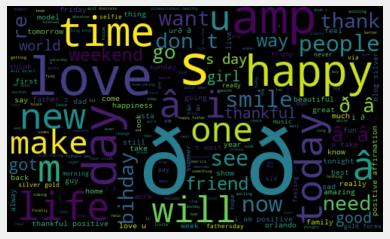

In [5]:
#Plot The WordCloud
allWords = ' '.join( [twts for twts in df['tweet']] )
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [6]:
#Create a function to compute the negative, neutral and positive
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

,id,label,tweet,Subjectivity,Polarity,Analysis
0,1,0,when a father is dysfunctional and is so sel...,1.0,-0.5,Negative
1,2,0,thanks for lyft credit i can t use cause the...,0.2,0.2,Positive
2,3,0,bihday your majesty,0.0,0.0,Neutral
3,4,0,model i love u take with u all the time in u...,0.6,0.5,Positive
4,5,0,factsguide society now motivation,0.0,0.0,Neutral
...,...,...,...,...,...,...
31957,31958,0,ate isz that youuu ð ð ð ð ð ð ð ...,0.0,0.0,Neutral
31958,31959,0,to see nina turner on the airwaves trying to...,0.5,0.4,Positive
31959,31960,0,listening to sad songs on a monday morning otw...,1.0,-0.5,Negative
31960,31961,1,sikh temple vandalised in in calgary wso con...,0.0,0.0,Neutral


In [7]:
#Print all of the positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ')' + sortedDF['tweet'][i])
        print()
        j = j + 1

1)  thanks for lyft credit i can t use cause they don t offer wheelchair vans in pdx     disapointed getthanked

2)model   i love u take with u all the time in urð       ð   ð   ð   ð   ð   ð   ð     

3) 2 2  huge fan fare and big talking before they leave  chaos and pay disputes when they get there  allshowandnogo  

4)we won    love the land    allin cavs champions cleveland clevelandcavaliers  â   

5)   welcome here    i m   it s so gr8   

6)i am thankful for having a paner  thankful positive     

7)euro2016 people blaming ha for conceded goal was it fat rooney who gave away free kick knowing bale can hit them from there   

8)product of the day  happy man wine tool  who s   it s the weekend  time to open up  amp  drink up 

9)beautiful sign by vendor 80 for  45 00   upsideofflorida shopalyssas   love 

10)  all smiles when media is      ð   ð    pressconference in antalya turkey   sunday throwback  love  ð   ð   â  ï   

11)we had a great panel on the mediatization of the publi

961)who is excited for tomorrow wwe money in the bank match  

962)see a happy face in everything   smile thegoodlife   camping mainus plak 

963) sooo true and food does not  does not  does not taste real anymore fakefood   truth

964)  choose to be happy today    quotes motivation inspiration   life choose today  

965)i am thankful for pillows  thankful positive     

966)my internet works again  let s record some videos hope that i can also upload a video for tommorrow  thanks for the patienceâ       

967)jana_personal_fitness  divulgaÃ Ã oeparceria inshot girls cute summer blur sun   funâ   

968)i ll be waiting for love  waiting for love to come around  â  â     day song aviciiâ   

969)music time baby  â  ï   baby happiness 29weeks   mommyduties family katana pamperingâ   

970)very pretty  blonde girl  franziskafacella     day  beauty  

971)reading trumps speech transcripts  can t tell if i m reading a 12 year old boys  diary or not   wedontwinanymore  china buildthewall

972

1627)it s good to have options    in amsterdam marknme 

1628)zara is one of the loveliest girls i ve met doing pageants  but i do agree with miss gb s decision to strip her title after love island  

1629)finding doryð   ð     ð   ð  ¾   great escape theaters   nitro 12 

1630)happy family â  ï   biglove love   

1631)make your life story so amazing that unicorns won t believe it s true   healthy love   

1632)ready 4 the wedding    me boy selfie weddingtime cute handsome cool blue smile  â   

1633) the list is created by a bureaucrat without due process  you really don t under the us constitution    

1634)thats right    wedding pay weddingpay bi celebration bride groom bridesmaids  â   

1635) i really wish could be there tomorrow dude but i really can t ð     

1636)my favorite place to be in the summer   love you chicago   ð        happiness chitownâ   

1637)  young family plays with his son in       aleksejplatonov baby boy child  

1638)    hot instafollow sexy instadaily best


2294)6 00am  delayed  why is it everyone i fly with you  the planes either delayed or faulty     crapservice

2295)i don t do this shit because i got to  i do it because i want to    because i love it  i ll never need permission to do what makes me  

2296)ready to go       

2297)happy father s day all dad day   fathersday followme producer creator youtuberâ   

2298) sigh  ó¾   fitfriday ó¾  ó¾      friday people enjoy  

2299)meal prep sunday   ð     mealprep sunday   preparation plan letsdothis smile fun 

2300)we got the flat       so happy     newsta firsthome  

2301)   thank you for shopping with tatacliq  hope you have many more such wonderful shopping experiences with us  haâ  

2302)my fiancÃ  loves me  thanks so much love u brad â  ï  ð    fiancÃ  verabradley love     briarwoodâ   

2303)i hope you guys have a fantastic summer and get out there and have fun  summer   flowers fun family enjoy 

2304)    bday to one awasome dj rakesh  many happy returns of da day  hva an awa

2960)a superb day for  golf day at  course in fine nick  guests had a blast    days 

2961)  project phase 1 complete  recycled skip dived planks  awaiting compost  amp  seedlings  back ache   beer   sofa   

2962)my 30th attempt at fnafworld chica s happy fun rainbow land  i hate that rainbow ð    rage   evilrainbow yousuck 

2963)get up get   get  enjoy music today free apps free music 

2964)good morning everyone ð   ð   â  ð   saturday morning   smile picooftheday citationâ   

2965)walkies with my besties make my hea happy  ð  ¾ walk bestfriends dog boyfriend cute  â   

2966)  time of our lives   doors opening left right and centre    â  ï  â  ï  â  ï  

2967)exercise your smile today    weekend smile   exercise fitness 

2968)  sex blonde online streaming adult  

2969)so often we think our country has come so far and then this happens     so many lives lostð    stopgunviolence 

2970)love this pic of my baby girl dancing in the sunset carefree   truelove 

2971)there s so much 

3626)    father s day to all the fathers worldwide  you are great people and thankyou for allâ   

3627)i finally found a way how to delete old tweets  you might find it useful as well     deletetweets

3628)always thank youð      love ryosuke 

3629)my new baby  lt 3 razer mouse deathadderchroma bae   

3630)new gilmoregirls and now a new book from   is fangirling still a thing    i think it s a thing  ð   ð     

3631)best homeopathic remedies for anxiety       altwaystoheal   healing peace    

3632)  sirf ashiq log follow karen iqbal galib wasi faraz mohsin ki full   poetry   no add   follow       f 

3633)  yeah  she ll be elected right after jill stein  a million words to describe urself and you choose  gamer    

3634)can t wait to get moved into our new home this weekend ð   ð    and for a week off ð         â  ï  â  ï  â  ï  

3635)  first day at neocon chicago   our commercial interior design industry show  feet tired but saw so many amazing new stylesâ  

3636) dude so stoke


4293) do i time me lance having one more hit on last tour before big climbing day  addicted   truth spo

4294)come visit the puppies of    interested in adopting a shelterpet   

4295)   they gymnasts faces when queenie walked in was priceless    lovely priceless

4296)great to meet   the best gin experience in london   worldginday tomorrow 

4297)  i live in a period where people celebrate  amp  congratulate 13 16 year olds getting pregnant ð      

4298)holidays ð   ð   ð   ð   ð   ð    france instamoment instagood   hi live life sea sun sunshine heyâ   

4299)why the more   actor will book the job from  

4300)my hea goes out to the people lives lost in florida and their loved ones  

4301)steak became even sexier   food foodie foodblogger   sexy  

4302)  i love edm so much      can t wait to get logic pro in the future ð     

4303)life is fun    live love photo canon america sesion panama colombia chileâ   

4304)perfectionism is the enemy of happiness  quote inspirational  

43

4890)9h the things i get excited about  little green paint  new brushes   decor decorator diy sunday 

4891)a kiss from a roseð   inshot girls cute summer blur sun   fun dog hair beach hotâ   

4892)how about coming to see 1 of our new vehicles this sat 11th open day landrover fleet   whats the other one  

4893) â   united states ibd tipp economic optimism  mom  came in at 48 2 below forecasts  49 1  in june   blog silâ  

4894)freshly baked u    gbp 9 99 get here   shop cool   home fun 

4895)to whoever broke into our office this weekend  that was really inconsiderate  you are an ass    why monday mondaymorning

4896)we need to beat them in cairo  that s the only way we can reply them appropriately       

4897)   they broke up 3 years ago and still shippers create new accounts to make up signing  

4898) and in a not so stunning response plan to nominate muslimbrotherhood member  to lead their  pay 

4899) my passion comes full circle   wow   i want 2 be in orlando aft trump  pulse 

5292)the cowboys racist  i m convince fooh  my nigga got 12 wins and y all gon swap him for the white boy who ain t did shit  

5293)the paperback of future value generation is now available    strategy book  

5294)i was really hoping for something good from microsoft at e3  i was disappointed  looks like it will stay unused for longer   xboxe3  

5295)ð      general knowledge quiz â   set fifty three  

5296)model   i love u take with u all the time in urð       ð   ð   ð   ð   ð   ð   ð     

5297)  this generation is brainwashed   most of yall dont know whats goin on in the world rn   

5298)deutschland time  gerukr euro2016   â  â  â   my favorite champions diemanschaft all the way

5299)i am engaging  i_am positive affirmation     

5300) reality   ð    ð    we live in a world where villains exist but superheroes don t      

5301)so many things happening this week  pumped nervous  

5302) black women free kerala girls sex photos

5303)  we loved our happy hour  with these amazin

5846)being happy is a daily choice    

5847)ty for the recent follow     to connect    have a great tuesday   gt  gt  get free  

5848)  going for my first appointment to try on some wedding dresses on today  ð   ð   ð      brideâ   

5849)mood of the day  â  â  ï  ð  ³mood of the weekend ð   ð   ð   ð   â µï  ð   ð   ð    regram lineapelle summer ð   ð   greece goodmorning joy   

5850)positivity â ºâ º always be positive  humor gym fitfam fitness running cardio nofilter love happiness   

5851)obviously some people on twitter quick to pick out a mistake  have you nothing better to do with your time  

5852)good morning london  off to regent  bond  amp  oxford today         

5853)i am thankful for fun  thankful positive     

5854)true obama s had no answer to fight radical islam instead he still defends them while bashing trump   

5855)whenever i m crying i like to eat hot wings so people just think it s the spice getting to me   hotwings

5856)that moment when you see that the ho

6291)  catarman cathedral goodafternoon friend   love 

6292)  there s people out there doing amazing things for this world who get no recognition  but this scumbag does    

6293)model   i love u take with u all the time in urð       ð   ð   ð   ð   ð   ð   ð     

6294)celebrate success and life  shakeyourbutt love life   invest  

6295)what limits a man does not limit god  vlicobs xoxo love grace   amen share passionâ   

6296)just launched our new venture educo  a jobboard for education professionals    staup edujobs

6297)first day of school  day care center with teacher cherry â º 06 20 2016    

6298)  so true  redemptionthroughcreativity  

6299)i am really staing to love this natural thing ð   ð   ð   ð      smile selfie hair naturalhairâ   

6300)  sydney vividsydney  blessed beauty beautiful happiness   lights love fitfam gym run lift hâ  

6301)pleyeo   ð   playacarvajal maes inshot cute summer blur    fun hair hot coolâ   

6302)ð  ¹ ed dancing ð    edsheeran dancing love 


6863)we all know that the difference between kpekere   plantain chip na packagingð    good evening   ramadan day 14 ð   ð   ð   ð   ð   ð   ð   ð   ð   ð   

6864)i love you too â   zacarylove9    contented blessed   maramag  bukidnon 

6865)see new webpage for  the orlando file   goodread   goodbook bookclub top10 medicalthriller

6866)on another note  me and damu are gonna go to a conce tomorrow night lol   i love conces

6867)lawofattraction for healing      altwaystoheal healthy is     

6868)new trending gif on     stephen colbe  happy dance 

6869)  live on blog  5 tips on how you can live a happier life     tips blogger blog 

6870) thank you so much for following me  please do read flightofalifetime  youâ  ll be very glad you did   smiles

6871)congratulations to mr ernest walls on his new ford ranger usedcars   tuesday houston texas thankyou 

6872)hey guys  apparently white and black people are even for that whole slavery thing  so that s nice   history 

6873)happy dog    d


7319)    euro2016 super bbq  lets pay

7320)  worldoceansday here s a quick post from the wwf highlighting five marine species educationispower 

7321)be   n healthy there is nothing greater than friendship in this world    tom hiddleston ff twhiddleston 

7322)fight the good fight of faith   1 timothy 6 12  vlicobs xoxo love grace   amen shareâ   

7323)gotta love when he shows up outta nowhere with a single pink roseð    boyfriend   feelingloved 

7324)fluffy  tesla dog dogsofinstagram   love 

7325)logo we proudly present our new logo ð    logo   makemyevent   make my event ht                   l    

7326)happy fathers day fellasð     enjoy   from   fathersday strongmen   menâ   

7327)  coral graveyard  the aftermath of bleaching on the great barrier reef â   in pictures    worldoceaâ  

7328)it s nearly time  euro2016 frarou comeonengland   

7329)  many r asking the same question  and not very hopeful anything will change  ppl r not willing to compromise    

7330)inside i m do

7907)real love stas from thy self  remember that     love instagood summer fun smileâ   

7908)   a broader phenomenon  the reemergence of race science in american intellectual discourse    cityjournal

7909)there has been so many acts of terrorism on our homeland under obama more than any other president  too many dead americans   orlando

7910)i m thrilled to reconnect with my long lost best friend  friends   grateful

7911)i am thankful for peace  thankful positive     

7912)love this  ó¾  â  ï  ó¾  ó¾  ó¾      

7913) i love that you replied and they didn t  unfounately  i have a contract and they are cheaper  broke people must suffer   

7914)  my hybrid golf gte is in for it s 1st service  i m able to walk home for the first time since my knee replacement happâ  

7915)live life well   teespring   hoodies womenteeshis  

7916)introduction to happy days    days 

7917)y all girls tough out here fam    lol  we appreciate y all though  lmao  jokes goochie  â   

7918)  who s in sit

8270)parent   bull up  you will dominate your bull and you will direct it whatever you want it to do  when you s 

8271)dad s are the most ordinary men turned by love into heroes      happy fathers day to all daddy s around the globe    fathers day

8272)happy friday selfieð    friday   

8273)just got back from the gym  it is awesome   the sad thing is that there is people that it s not following me anymore    gym  

8274)  rip the greatest muhammadali  ð      

8275) yup  i concur  as do nearly 3 million voters  

8276)had an amazing week at my mans house   ð   ð    now work is done  back home to relax then off to see my bestie later  perfectday amazing  

8277)for more info  you can call on   961 76 033 386  prime camp   kids spos activities summer  games 

8278)we are members of the encinitas 101ð   ð   ð   ð   ð   ð    encinitas proud keepitlocal   drcoadiâ    

8279)today s stream will be a giveaway stream  hope to see many of you my teemoarmy  leagueoflegends twitch teemo   lol


8665)  set up day  getting ready for the arrival of our hospitality guests tomorrow   here we go â  

8666)  affraid this is going to be all mercedes this weekend  huge gap with the rest   

8667)sold my first game on my website  pretty happy firsttimeforeverything   nolife whydoihavesomanyhashtags ihavewaytomany

8668)hello melbourne   so excited to be here  so   melbourne omg wow sobeautifulhereâ   

8669)â  ï  dermaworld familyâ  ï   dermaworld beauties philippines beautifull love family  â   

8670)when you re with your best friend bestfriend crazy love fun boyfriend   sunday weekend driving 

8671)don t gain the world and lose your soul   wisdom is better than silver and gold   ð   ð   ð    â   

8672)days like today  i feel confident in my own skin   feelingpretty 

8673)  lovely lunchtime run with  in brighton now we re ready to tackle the afternoon    worklife 

8674)mfw we pick up and there s a huge nug inside   cannabis marijuana dank ganja ilovemj   

8675)sometimes life is 

9523) the main stream news media like  was busily covering a small hand  misogynist  to notice  

9524) 1466146848 03  update    social analytics marketing wellness   leadership 

9525)it looks brilliant  

9526)watching the recent presentation   it occurred to me that engineers dont understand humans  apple has fallen in love with itself   

9527)morning this my idol   love you

9528)i am free  i_am positive affirmation     

9529)i am stunning  i_am positive affirmation     

9530)finding dory with my best friend tommorow   findingdory

9531)    1 is looking great   

9532)    1st bihday poms brilliant cake by  to celebrate a fantastic year lichfield 

9533)     terribly depressing news ppl we losing way to many awesome ppl nowadays so   rite now â  

9534)enjoy being a kid  summer slides   

9535)do you dare to fight me ð    hahahaha puppy cute   

9536)happy bihday johnny   ð   ð   ð    johnnydepp bihday   bihday johnny depp johnnydepp  

9537)  but oh  so true  

9538)  i don t th


9956)  the saddest saddest aspect of the peshawar scuffle is the lesson taught by the father to his young son   

9957)wow that s a new record  made me cry within 3 mins diysos   amazingpeople

9958)i am thrilling  i_am positive affirmation     

9959)i m sure the  will still suppo him  amp  the right to have a gun    wakeupamerica    

9960)america first before all others we should be ashamed of our selves  

9961)so the  non invasive ventilation study really stas tomorrow  first review meeting     

9962)i am thankful for being able to choose  thankful positive     

9963)always love yourself 1st   â  ï  ð   ð   ð  ¼ð   ð  ¹ð    love   smile tuesday selfie ð    iamwhoiamâ   

9964)i am valued  i_am positive affirmation     

9965)i am truthful  i_am positive affirmation     

9966)want to hear my thought on various forms of love  go here to join the free challenge   communication  

9967)oh  well i missed this sight today    very remiss of bessie not to wake me at dawn  

9968)impre

10532)entering a new phase in my life the feeling of going back to student life making my hea thumping thumping   punediaries sta ð   

10533)  mazara seems like a good guy  too bad he s on the rangers  another year on this team and he will be a thug  that s what haâ  

10534)found my old pic when i just got my braces  left jan  right may   ð    

10535)despite all the studies most diabetics i know would rather take pills than even try a plant diet for 3 weeks     

10536)living the dream ð     fashion love   gypsysoul nature photograph pueobanusâ   

10537)sunshine daisy tote bag   great for the summer  hippie   flowers totebag fashion 

10538)be happy today because you never know what tomorrow will bring    makeachange 

10539)this doctor has not been nice     ð   

10540)all checked in online ready for next week â  ï  ð   â  ï   holiday  

10541)yun hong wang is an employee of the company happy inn  uk  ltd  see more      uk  hong  wang

10542)   so many changed profile pics with br

10955)  thank you so much for singing i still haven t found what i m looking for  it s the soundtrack to my life â  ï  fave  

10956)  wild iris   nature photography quality prints  amp  cards at  

10957)what is a detoxdiet   altwaystoheal  healthy    

10958) thanks â  â   i m   i have twitter too 

10959)we didn t know then  of course  that this would be don s high point    

10960)check out this new trending funny gif      kanye west  jay z  exciting 

10961)looking to feel more joy  join me and 20 speakers on the free summit unleashyourjoy    

10962)the greatest gift of life is friendship  and i have received it  friendship girls  â   

10963)zosh cardo  zosh cardo   carnival is over  presentation trip   calm

10964)ð    love instagood photooftheday top tags tbt cute me beautiful followme   followâ   

10965)follow me insta  retweet it bbw curvy squi big ass pussy  sex sexy thick bbwlover kik   

10966)so wait  the gop is willing to stand by trumptrainwreck in order to make sure 

11621)come and see us tomorrow in this amazing event  stall 4   we are hyped and ready to rock    

11622)donaldtrump   i can t wait nothing good of a   racist  and misogynist   misogynist  than see to the women like animals 

11623)what a fantastic day  lovely clients  brilliant training session at the gym and fabulous dinner out  mistress is  

11624)first full on complete rest day in a long time  baked a crumble  first ever youtube video coming this evening     

11625)so   i was walking near central park today and i got to meet the living legend jackie mason   what a    

11626)first day of work  i have arrived ð    work hospital   

11627)checkout today s trending gif of the day     news  excited  friday  super  joy  wonderful  joie  ongagnetoujâ   

11628)check out what i shared choosejoy healthy   could a breakup be the secret to a healthy life   via 

11629)prayers for florida and lgbt community   love peace  

11630)happy fridayy      friday   photo 

11631)disneyyyy ð    self


12288)we live amongst people who prefer honey coated lies to the bitter truth   

12289)thanks so much  

12290)happy father s day ð     ç  ã  æ   ã ¹ã  ã ¼ã  ã  ã  ã ¹ã  ã   ã ¹ã  ã ¼ã  ã  ã  ã ¹ ã ¹ã  ã ¼ã  ã  ã  ã ¹ã ³ã ¼ã  ã ¼ ã ¹ã  ã ¼ã  ã  ã  ã ¹ã  ã ¼ã   father s day  â   

12291)good morning ð  ¼  goodmorning bomdia breakfast morning coffee   me monday sunâ   

12292)first recital week as an alum and it s still just as great    ð   ð     

12293)be joyful in hope  patient in affliction  faithful in prayer     befaithful love  â   

12294)ð   ask the cdc maybe  drs hands are tied even if they re aware  amp  recognize chroniclyme due to ignorance ð       

12295)always  be happy  be gorgeous  be  happiness   beauty lifeincolor behappy yogaâ   

12296) brutality rules new year on manus  close manus auspol australia  refugeeswelcome noborders

12297)ku klux klan originally an arm of the southern democratic pay to terrorize freed slaves and republicans who sympathized with them 

1

12869)annenbergspace    stodda_photos  refugee s from conflict in iraq enjoy a peaceful hâ    

12870)home with incredible features unwind over the weekend around the bonfire with your family  amp  friends   weekend  

12871)for what love whithout proof  

12872)thoughts and prayers to her familie and friends stay strong  ð  ¼ripchristinagrimmie   ripchristina

12873)new business opening redhill on 23 july   italian leather children s shoes   we can t wait to see the new shop  

12874)there is only one of me  or not       pick your copy   ð   ð    covergirl   proud marieclaire 

12875)so excited to be setting up my own business very soon   ð   ð   ð    xxxx wedding weddingplanning princestrust business   careergirl

12876)i have observed this myself being true   what you think   psychology mentalhealth science   day happâ   

12877) you re the only person who can make you    you re as happy as you choose to be    rick warren 

12878)my very first survey came today and it was good  that

13287)happy ramadan month ð    

13288)  is excited to have you  rec405 

13289)lawofattraction for healing      altwaystoheal healthy is     

13290)ð    my sentiments exactly  this is not just a war against minorities  this a war over control and how we should think 

13291)what politician will be the first asshole to condemn lgbt community following the unspeakable tragedy in orlando prayers4allinvolved  

13292)herbal sleep remedies that work    altwaystoheal healthy healing      

13293)can atherapy and musictherapy heal your life    altwaystoheal healthy   healing  

13294)    about the tsa summer fete  friday 17th june   children s driving experience confirmed  

13295)thank you to the kind person who decided to have a bit of fun last night and spoil ours    ð    whatsthepoint    

13296)driving down to the moniaive comic festival   

13297)got austin s car back home safe and sound  great day at the obx with  perfect weather  perfect day and i even got to drive  

13298)these st

13925)  genuine appreciation by my former students for my educational services  amp  mentoring contentment   thankyou     htâ  

13926)my new book cover  iâ  it so much   books thebitter newrelease nextweek romance   preorder love 

13927)dads are gifted  they lead the money game  so  that s why they always win    fathersday 

13928)model   i love u take with u all the time in urð       ð   ð   ð   ð   ð   ð   ð     

13929)new hair for the summer ð   ð  ¼ girl   bob fringe love 

13930)a take no prisoners attitude is okay when it comes to murderers  all people and organizations should be accountable if a murder occurs  

13931)when i was young    photoshooting 2010 model indoor eyes tb attitude longhair dress lookingserious   

13932)   but true   ð   ð   

13933)gentle giant  dogsofinstagram reggie whitelab   

13934)model   i love u take with u all the time in urð       ð   ð   ð   ð   ð   ð   ð     

13935)  guitar is life  music is life  my life is note  love like music guitar gir

14408)i am giving i_am positive affirmation   

14409)12 carat hydrothermal alexandrite â   we re   to see this made into a beautiful piece  jewelry colorado 

14410)prayersup for christinagrimmie family     wow    

14411) thanks for sharing andrew jones    sunday    sharingiscaring  via â ª  grow followers ð    

14412)    writing  amp  lovely reading    amp   love life s loves   lt 3

14413)looking forward to receiving something pretty special from the  team for our goody bags  areyouastationerylover   papower

14414) stop legitimizing by using  alt right   amp  call them what they are  neonazis     from nazi doctrine  incl ultranationalism     

14415)totally love this one    lt 3     love   summer 

14416)model   i love u take with u all the time in urð       ð   ð   ð   ð   ð   ð   ð     

14417)want to be    do what happy people do  behaviorchange behaviorchangers 

14418)next year should be a breeze  huh  lol mashpeepd lotsofsurprisescomingup         

14419)   proud to be a ch

14925)  the kind of  we can expect in trump amrica

14926)what   looks like run gratefulfeet centralpark nyc amazing day   central park 

14927) woohooo you guys are very busy bees  cnt wait for the album    ð   ð   ð   ð   ð   ð   ð   ð   ð   ð   ð   ð   ð   

14928) the braves should be ashamed of what they re putting on the field  they have no interest in winning til after the move  

14929)happy fri yay  have a great weekend  friday b2c weekend   celebrate 

14930)a perfect morning morning morningcoffee coffee strudel   instagood 

14931)good night  ð   ð    godfirst happiness smile beautiful mood   love goodnight sleep liveâ   

14932)i don t want to bring people to a religion  i want to bring them to jesus christ  the son of the most high god    sabbath

14933)try a few of the ideas on this list and see if their day to day practice helps you become more     mentalhealth

14934)  friday   what are you up to this weekend  enjoy family friend 

14935)i bought new nike shoes yay   ð 

15239)  bihday later for my lovely sis love chocolate our favorite cake mochaâ   

15240)happy visitors  customers   mahome pillows marioaavia costarica home decoration textil 

15241)monica and tessa is happy since she is blowing hard  on facebook  tessa monica since   blowing 

15242)at gymð  ª     things that happenâ        day gym gymtime goodvibe love peace energyâ   

15243)  fashion it is a true   fact

15244)i am thankful for my best friends  thankful positive     

15245)orlando  fl has taken so many l s this week  

15246)anyone who says sunshine brings happiness has never danced in the rain  dancing   neoballet

15247)they ll never understand        perfect_sad_boy   boy love k korean kpop arab_exoticâ   

15248)as a leader someone is always watching i gotta always keep it real with myself first me first me first  monday yall

15249)be   and stressfree  free intro to vedic meditation on sunday july 10  4 5 30pm at 1848 w 18th st  in chicago chicagomeditation

15250) the real

15786)me  amp  my love jacksonlevans sleep nap love itsalmostover   relaxed 

15787)the strength of our motivation is such honest reviews   customers zomatoreview zomato 

15788)childhood   bull up  you will dominate your bull and you will direct it whatever you want it to do  when yo 

15789)aww yeah it s all good bing bong bing bong   

15790)  bihday flor    the best master mixer in the world       xoxo  feliz cumpleaÃ os flor      el    

15791)what petty airpo this is arlanda   limiting amount of free wifi either offer it or dont sometimes there are flight delays   stockholm

15792)my beautiful girl zelda all   after grooming dog pretty puppy ilovehersomuch shes spoiled 

15793)scientific meeting of  followed by bollywood inspired feastð   ð  ½   minds  amp  happy tummys â ºï   perfect10 

15794)outstanding achievement  very happy       greatday

15795)i muted her because if she comes back to say something sma and inconsiderate about me all because she can t learn to love herself 

In [8]:
#Print all of the neagtive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j)+ ')' + sortedDF['tweet'][i])
        print()
        j = j+1

1)  when a father is dysfunctional and is so selfish he drags his kids into his dysfunction    run

2)the next school year is the year for exams ð    can t think about that ð    school exams   hate imagine actorslife revolutionschool girl

3) â   ireland consumer price index  mom  climbed from previous 0 2  to 0 5  in may   blog silver gold forex

4)we are so selfish  orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking   values love 

5)sad little dude     badday coneofshame cats pissed funny laughs 

6)it was a hard monday due to cloudy weather  disabling oxygen production for today  goodnight badmonday  

7)it s unbelievable that in the 21st century we d need something like this  again  neverump  xenophobia 

8)yup  being a knicks fan is hard  so its easier to just be an nba fan when the playoffs roll around ð    

9)whenever im   and something goes wrong     

10)  let the scum baggery begin      

11)carrying a gun wouldn t of helped if you can

433)  bihday to my baby gemini sis  she was due on my bihday  june 8th  but came on theâ   

434)chepstow  gwent   police appeal following 2 alleged  assaults  wales cymru

435)ridiculously   nevous sick for this game englandvswales england ð   ð   â ½ï  ð   

436)filling the void in my hea with back to back conces all july long   

437)    show me a store that had a tomahawk steak and i will run down oxford street naked aka  nosâ  

438)new cover on my facebook page  gary jules   mad world    garyjules madworld cover mad world   pop

439) sad to hear that as you say a gentleman  

440)long holidays have just begun wiz rainy day   dragon boat festival  ç  å  ç  å  æ  ð  ² niftycap simplysmilestayawesome 

441)  the holidays are a violent time for me  and iâ  ve begun to question the impoance of families â  familycircus chriâ   

442) how long will be the delay  i might miss an impoant briefing bcoz my flight keep being retimed   pissedoff

443)it sucks when you want comfo and the perso


718)you tell versions of lies   with your hatred and vile attacks upon black men and women  theron     

719)igersbnw   attack bull game 3d  do you really think that his head was empty around the city  each side is s 

720)why only target little muslim children for mispronouncing  terraced house   amp  treat them like criminals â   

721)it s not easy being angry all the time  contemplating life    soangry birdâ   

722)wen will south choose dark south heroines  kajal tamanna amy wtf      

723)i m feeling really tired  also feels like i ve gained a ton of weight  also can t run fast  mental game not strong atm   runchat  

724)oh  on      never mind   potus muslim sick   

725)  holy shit trump  1 person cheering   o n e       not all of new jersey like you lied about     

726)counting down to ccmf at myle beach sc    timmcgraw salt sea sand  amp  country music   countingdown ð   ð   ð  ºâ  ï  ð     1day

727)  this is the year of change   from blue to green changinglives businessop

982)  at least 14 200 people agree with him    

983) â   canada ivey purchasing managers index increased to 58 4 in may from previous 50 6   blog silver gold fâ  

984)inspired by  featurme featurethis   life sucks depressionhastakeno    funimate 

985) 2016  you re a mean drunk  go home    rip

986)weird i am making my first trip ever to detroit and gordie passed away  going to visit the joe on the way out of town to pay respects   

987)  flight is delayed and the ramp is empty    avgeek    boise airpo 

988)   who sounds like the idiot   throwing a temper tantrum like that   are you under 12  lastword  

989)  blocked me on twitter   highlighting the left s intolerance  amp  oppressive  free  speech tactics  he sets a terrible example  

990)nigger pattismith book   wtf  that s  reich  

991)hate it when u get involved can t wait till u leave for uni sister    ð   ð   

992)is cleveland gonna have it s hea broken again tonight  just like the past 50 years   nba  

993)   i got 3 6t


1230)what s colder  my mouth after these mints or my hea   edgy dark teen   cold mouth mint sarcasm  ironic  whysomanyquestionmarks

1231)i miss my brother    he has been mad at me for years    long story   but just going down memory lane    brother 

1232)the girl from a   home sensed something was wrongâ  but never met the little boyâ  until years later mystical supernatural psychic

1233)  obama  guns are bad  hate is bad  but still not a word about islamicterrorism you ll never defeat an enemy you refuse toâ  

1234)love has a nasty habit of disappearing overnight â   thebeatles aye selfie liverpool   

1235)what about your dad s tax returns  must be difficult having a racist fraud for a parent    

1236)walking out the door knowing you re not gonna see your family again for at least a year is absolutely devastating  

1237)ð   â  ï  ð   ð   ð   ð   the happiest trails 2 u elizabeth  until we c each other again    ð   â  ï  ð   ð   ð   ð   ð   ð   ð   ð    

1238)in 2 days the hog

1383)black12iwhiteboy   na  porn nude xxx nasty young   horny slut hot shy sexy naughty kinky we    

1384)bitches sad as hell sleeping by themselves ð    rolling over and keep checking ig and shit    ð   

1385)when you smile they don t know why but when you upset they know ur mad  staypositive   smiling  retweet 

1386)  let no one who loves be unhappy alchemist gift  sharethelove4authors   reader goodreads kiâ  

1387)was scrapping about to find money when i heard the ice cream van  only to find it was on tele  waste  

1388)maga maga3x this moron who tweeted this sewage below doesn t understand why he and hillarylost â   

1389)now i understand why vegans and vegetarians are such miserable souls   they don t eat bacon   

1390)it must be horrible to be so filled with hatred  my thoughts go out to the victims of violence and to the roots of it    orlando

1391) go fuck yourself richie  we like it and it s not going anywhere  ð    

1392)you re no good  but it s time i love you  baby

1702)what over rode journalists  integrity was greed and ambition  along with a total absence of courage  

1703)in the dark you can not see tears dark  nigth   depression imacityangel americanboyâ   

1704)crazed woman  launched sick attack on muslim cab driver over Â 7 fare    islamaphobia   

1705) must be kicking themselves  missed out on a spo chats merger    sorrynotsorry losers nba

1706) with respect  you have no logical ability and are totally unable to rationalize the obvious     

1707) you need to go away and work on yourself   are you serious jp     mic

1708)the emotion of family  amp  friends was unbearable to be in that dark energy  i was    amp  hu  close to depression  i had to snap out

1709)   islamic terrorism killed him or her americað  ºð   

1710)kiss someone everyday make them  

1711)typical ain t poor sentiment that the gop has been suppoing for decades now  makes me   

1712)ð   late footy last night ð      argentina

1713)i know that i m kinda busy lately  

1906)if i posted a picture of a different fingerpuppet  from my collection  every day   i d have enough for at least two years  that s just  

1907) sad little audience     sparse

1908)  i hate it when my internet friends are on summer break when i m still at school     fairytail anime nalu   

1909) my family s horrible  attack at thegreenpalmcottage in plettenburgbay westerncape thyini thiza  we want tâ   

1910)i get to watch orange is the new black today      oitnb  

1911) white  good  dark  bad  itâ  s a twisted version of  thatÂ makes india racist against its own people  

1912) in my previous job every white person s response to  was doing the mannequinchallenge  amp  that s including ceo  amp  mgtâ  

1913)  just a   little goat   

1914)creating new material is actually the worst thing to do ever i want to die composition music creativity time sibelius cold   tired

1915)tory pay   capitalist   labour pay   socialist   green pay   environmentalist   liberal pay   coalitionis

2049)sad how muslims eat during the ramadaan     noshame

2050)when you fail to buy an apament because you had to pay an unanimous bill pissedoff  â   

2051)  little peeker  what monitorlizard 

2052)mcds   dq  and little ceasars because mex lost ð   ð      depressed

2053)and i m counting down ð   ð    its 6 days till summer  since i shot this photo yesterday ð   ð    _x_ cantwait   

2054) man knows ur dream  an tries to ruin it   

2055)literally at the bar by myself to watch the end of the finals game   game7 lebron

2056)i am not ready to leave minneapolis tomorrow    minnesota minneapolis

2057)funnyvideos   attack bull game 3d  do you really think that his head was empty around the city  each side i 

2058)mixing some business and pleasure at the reds game   sad to see a colleague go back home to india  â  

2059) what is wrong with these guys     this is supposed to be an occasion for everyone to enjoy  

2060)tragic   time4change timeforasaferamericaforall prayfororlando amp 

2303)  pulseorlando prayfororlando   ron houston center for the performing as 

2304)  my chopperlove  thoughts  amp  prayers go out 2 all victims  amp  their families in this horrific tragedy  mass shooting in oâ  

2305)my roommate s phone keep ringing  and mine just ring when my arlam is on  sad    

2306)  need out of washington state  the gray is not healthy for my mental health    depersion washingtonstate

2307) if you are hispanic black asian a non racist white  other minority don t serve in military while  in power â  

2308)ever been hu so bad emotionally you hu physically      depressed hu life

2309)  lady in line to give blood  when i woke up this morning i heard it was 20 dead  amp  i thought it was just a small thing   orâ  

2310) you would think people would care about the poor children starving       but in the  me  gen  they don t give a shit  

2311)  i hate that plastic thing around my head   purrs 

2312)millennials shocked by  hillary quotes think theyre from tru

2506) obama jarretts who agenda was to destroy everything good about this country and inflict even bit of hate 

2507)igersbnw   attack bull game 3d  do you really think that his head was empty around the city  each side is s 

2508)mitt lost the bloody election   u amaze me w living in the past   increase yr meds ur stuck in the past    

2509)i feel like a freaking superwomen ð   ð    single mom holding everything down with no help blessed thankful grateful   cantcomplain

2510)  says aap behind making of  udta punjab  movie jobs jobsearch   chandigarh  the controversy around cr    

2511)   not sure you understand what bigotry is   

2512)why do people always sta sentences with so   its almost as annoying as being tweeted by a ukip follower 

2513)that feeling when my hard work pays off is undescribable mondaymotivation goals  

2514)halaaaaa     anyare ke orlando     sorry this happened    nagpapakatanga   

2515)football then game of thrones  chilleve      

2516)ã   life is way t

2709)when you get home and realize you bought a fake flower from homedepot    

2710)are â   black  amp  feel like the  are stomping on you  listen  retweet tampa miamiâ   

2711)babies   aden by aden anais burpy bib single   oh girl   bouncingbaby

2712)  madly waiting for the aymcuainraiser and the 5 rocking songs  aym      

2713)true wife sex stories  chick gets fucked 

2714)so   tis best if rational human beings do not get angry at the mentally ill  their delusions should not inspire anger  

2715)   and barney  is flat out again  walkies stannes wherelifefeelsgood  doggieholidays    ð    

2716)new trending gif on     hbo  monday  frustrated  curb your enthusiasm  larry david  curb 

2717)once again  miami west and teacher late  class was supposed to sta 10 mins ago   no one seems to care  

2718)it s a grey kitty  ð   ð    cats   

2719) this is our time to fightback against evil men such at donaldtrump and his  homophobic and ego  peacein2017

2720) matt you ve turned very sad

2831)ð       dog fighting advocate and all around jackass steveking just won the iowa gop primary   ð     enddogfighting 

2832) is now a datacosmologist  you can become one to  join us in the data black box at 1pm  nhsscot16   

2833)  fuck the haters  ð   ð   ð   ð   ð   ð   ð   ð   ð       

2834)    and you re profiling based on looks  isn t that illegal  butthu   feelthebern

2835)wish i was black   i could have lots of feminists shut down for   amp  homophobia

2836)eph 4 26  be    and do not sin   do not let the sun go down on your wrath 

2837)only a few weeks away from the shooting days  it makes all of us utterly   to see how this project is coming to life  fragilityfilm

2838) you must be getting   about buying yourself some new lycra round about now notlongtogo 

2839)i have never seen anything so utterly pathetic as a sorry for herself houdini doc who s back from having her teeth cleaned at the vet  

2840)you know  with such acts like this  humans don t even shock me anym

3095) ð    i ll be behind the sofa ð    too scared for f1 stas these days  i m getting too old  nervous   canadiangp teamlh

3096)   we really are the worst  entitled   

3097)  about a new season of curbyourenthusiasm funny hysterical  

3098)f    this  ð   ð  º government that deliberately toures refugees  we just had a coronial inquest into hamid s death  amp  business as usual

3099)twinklatinboys   na  slut snapshot hot nasty naughty sexy horny shy porn nude   kinky xxx y    

3100)don t feel   over someone who gave up on you  feel sorry for them because they gave up on someone who    

3101)after my massage  i found out that my cavs are down  sana hindi na lang natapos massage ko   

3102) when is his crap going to stop orlando  needs to do something along with the american people  

3103)the walking dead has brainwashed america    unhealthyobsessions

3104)if you follow me for my body  you are selfish  i just want to live a normal life     depressed in 2016 loveme imsecretlyhorn

3380)season 4 finale hit me hard  doctorwhoedit edits fandom   regeneration drwho      vine by  

3381)got 4 episodes of game of thrones to get through tonight ð   ð   ð     

3382)i hate how i used to be hungry to travel the world   but now id rather stay home to avoid getting raped  migrants islam crisis   sick

3383)i agree  respect for mahindra who build robust cars  experience is ruined by careless dealers    1 2  

3384)a treat for our customers is on its way    news treat secret itzeebitz smallbizhour  uksmallbiz dorset 

3385)   commercial  cow  chipotle via giphy  

3386)broken   buffalo simulation  buffalo for you to take in the vicinity of their homes to do  in this way  you 

3387)    that i have to work because i need money but i fucking hate working

3388)  due to the nature of my work  i miss fav themorningfix  have to catchup on twitter         

3389) amp  i designed a gender neutral jumpsuit to call out subtle remains of  involved in buttoning a shi    

3390)second 1

3713)poor poor buccos   

3714)cavs lose the nbafinals  indians are in 1st place   will miss the playoffs  browns   well we all know how bad they are clevelandfan  

3715)  im so pathetic  eminemslimshady marshallmathers followmeanime depression rappers quotes  blacknwhite kâ   

3716) racism stuffed into skinny jeans with a hipster comb over is just as bad as racism shrouded in a white hood altright   â  

3717)  it baffles how dumb and how much of a puppet and sheep you are keep collection that paycheck   paid codisdead

3718)no matter what i do  my world is an empty place  

3719)uhhhh how long has it been since we graduated   missit

3720)  tell me before today have you heard of one america news     your not into propaganda   clown donthecon  

3721)longest period of time i ve been out of internet for at home  incompetent agent  amp  landlord  it will be 1 month and 1 week without     

3722)   worked with the worst congress in history  republicans

3723)six animals killed because 

3920)my ð    amp ð    go out 2the victims  amp families of this horrible attack in orlando  if ur a  voter think twiceâ  ï    ð  ª votetrump2saveð  ºð   

3921) if thats ur logic you should be aftr cheney  since his active decisions lead to the the death of thousands of military   

3922)new poem 2 9  i m confused     confusion hypocrisy   spokenwordpoetry poems sociopolitics excess distress

3923)  father s day to the single mother s cause these  bitch ass niggaz  can t even get a job or paid bt wana date ð   ð   ð   ð   

3924)late   ff to my gamedev indiedev indiegamedev squad     

3925)  she was not   right   she was a decent  concerned human being that did not see things in black and white   

3926)attica  attica  attica  oh this is so      grrr     oitnb season4 episode13 oitnbchat bingewatching  

3927)  bihdaygirl champers and creed this morning then surprise time    ð   ð  ¾ð  ªð    it s bloody roasting  ð   â  ï   

3928)there is little difference between rjd of bihar n   of


4174)  waiting for my chicken breast like      ð   ð   ð  ½   humpday curves vegas instadaily hungry 

4175) trump is guilty of treason    we theresistance must resist   hate  naked raygun treason 

4176)dont hate watz on me hate wats in me sauce saucegod   fathers day 

4177)anime website is down for maintenance  

4178) hey congress how about instead of sending out thoughts  amp  prayers u do something it s ur fucking job    orlando ð  ºð   

4179) â   us may ppi  inflationary pressures slowly building   wells fargo   blog silver gold forex

4180)  hardcore techno remix tight shaved pussy  

4181)born to travel   forced to work ð   ð   â  ï   travel travelgram traveling girl   hap   

4182)lebron 6 8  and no post game     

4183) more like whack jobs   they re going to alienate everyone who has been so generous and ruin it for the rest of us    pathetic

4184)we re also not upset we lost because we won by any measure other than a   useless appendix of government thaâ   

4185)i live

4264)   obama just cleared the cow path old leaky bovine hillary will clatter along to return to the house she oâ  

4265)yeah man fuck feminism 

4266)  feeling like you need something to change  not sure how  i can help  atsopro livelife   hypnotherapy fear 

4267) â   united kingdom total trade balance up to Â  3 294b in april from previous Â  3 83b   blog silver gold foâ  

4268)life brings out the  monkey in me ð  µ   crazy crafts spongieacresbedandbreakfastâ   

4269)let my crazy out way too soon  

4270)these clouds look a little     forge pond park 

4271)a girl could really fuck ur head up ð   ð    it s so   ð  ª

4272) today a amp e visitbadweatherbadhayfever  bad attacksnebuliser steriods    been well for 3 months  gutted

4273)soon in egypt segregation poor rich corruption   devastation ð   ð    

4274)cloudlovers   attack bull game 3d  do you really think that his head was empty around the city  each side i 

4275)when you order a margarita and it s pink  drink it before a

4525)  you know how to stop being called angry   stop acting so angry all the time  teamangry lakeoffire ableg 

4526) college park md marriott is absolutely useless  please fix this before you lose a rewards member for your horrible service   

4527) the same affect with drugs   deep depression depressing downinthedumps

4528)hanging me upside down ð   ð    upsidedown   smiles couple boyfriend girlfriend playingâ   

4529)1d   polar bear climb racing  angry polar bear climb racing  the polar bear living in cold places looking f 

4530)trainhard   polar bear climb racing  angry polar bear climb racing  the polar bear living in cold places lo 

4531)hard work    backstage lookbook lovemyjob new staff model polishgilr brunette beach sun   fashion    

4532)oh dear sorry for your loss ivan may her soul rip 

4533)in the past year or two  i can t recall a more depressing day for news watching  opinion reading and political speech  on all venues   

4534)sad adult t shi  swag shioopia quote


4621) snookums  don t be mad that bernie chan isn t as good as trump at campaigning  pathetic  

4622)six scientists  six suicides  what secret are they dying to protect    goodread   learn a secret to long life 

4623)random bihday bourbon 2 days before   this is a bday week  not a day bam    

4624)that must be sad ð      fun meme memes gag gags football soccer ilovefootballâ   

4625) first month paid and played in dcuo  sadly i m not impressed constant downtime during my play time hours   

4626) antisemitism    kills  in 2017 remember  no one is born to hate  love can change the world  

4627)and the dev grind begins again webdev html css java work late   webdesign

4628) chick gets fucked crazy european sex

4629) yet again another day trying to ring your shit customer service numbers    no response   even rang 

4630)golden state rallies around draymond green  the mad warrior  for it to even be considered is truly mind blowing  

4631)7 ways facebookâ  s repoingsystem fails its

In [ ]:
#Plot the polarity and subjectivity
plt.figure(figsize = (8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [10]:
#Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tweet']

round ((ptweets.shape[0] / df.shape[0]) *100, 1)

49.7

In [11]:
#Get the percentage of negative tweets
ptweets = df[df.Analysis == 'Negative']
ptweets = ptweets['tweet']

round ((ptweets.shape[0] / df.shape[0]) *100, 1)

14.6